In [1]:
# 기존의 이미지 데이터가 적을 때 사용 : 이미지의 갯수를 확장
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import  optimizers

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 이미지 확장
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
#                                   rotation_range=5,
#                                   shear_range=0.7,
#                                   zoom_range=[0.9, 2.2],
#                                   vertical_flip=True,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    './colab_train_test/train',  # 학습셋이 있는 폴더
    target_size=(150,150),
    batch_size=5,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './colab_train_test/test',  # 학습셋이 있는 폴더
    target_size=(150,150),
    batch_size=5,
    class_mode='binary')        


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
# CNN 모델 만들기
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [12]:

# 모델 컴파일 
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0002),
             metrics='accuracy')

# 모델 실행
# history = model.fit_generator( 
history = model.fit(     
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    validation_data=test_generator,
    validation_steps=4)

Epoch 1/30
32/32 [==============================] - 2s 50ms/step - loss: 0.1543 - accuracy: 0.9375 - val_loss: 0.1535 - val_accuracy: 0.9500
Epoch 2/30
32/32 [==============================] - 1s 46ms/step - loss: 0.1646 - accuracy: 0.9312 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 3/30
32/32 [==============================] - 2s 46ms/step - loss: 0.1258 - accuracy: 0.9500 - val_loss: 0.0548 - val_accuracy: 1.0000
Epoch 4/30
32/32 [==============================] - 2s 48ms/step - loss: 0.1603 - accuracy: 0.9438 - val_loss: 0.0599 - val_accuracy: 0.9500
Epoch 5/30
32/32 [==============================] - 2s 47ms/step - loss: 0.1081 - accuracy: 0.9812 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 6/30
32/32 [==============================] - 1s 46ms/step - loss: 0.1293 - accuracy: 0.9187 - val_loss: 0.1303 - val_accuracy: 1.0000
Epoch 7/30
32/32 [==============================] - 1s 45ms/step - loss: 0.1243 - accuracy: 0.9625 - val_loss: 0.1242 - val_accuracy: 0.9500
Epoch 8/30
32

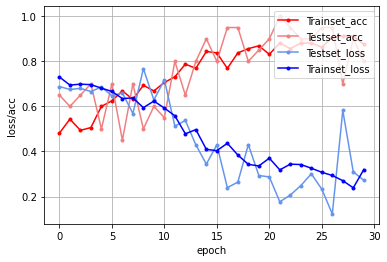

In [5]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss =  history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral",
        label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue",
        label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

 is a normal


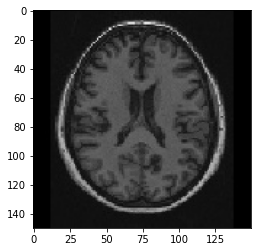

In [9]:
from keras.preprocessing import image
img = image.load_img('./colab_train_test/train/normal/normal_train_1.jpg', target_size=(150,150))
plt.imshow(img)

img = np.expand_dims(img, axis=0)

classes = model.predict(img)

if classes[0][0]>0:
    print( " is a ad")
else:
    print(" is a normal")